In [1]:
conda install python-graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/Maarij/opt/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.0              |   py39hecd8cb5_1         927 KB
    ruamel.yaml-0.16.12        |   py39hca72f7f_3         175 KB
    ruamel.yaml.clib-0.2.6     |   py39hca72f7f_1         126 KB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  ruamel.yaml        pkgs/main/osx-64::ruamel.yaml-0.16.12-py39hca72f7f_3 None
  ruamel.yaml.clib   pkgs/main/osx-64::ruamel.yaml.clib-0.2.6-py39hca72f7f_1 None

The following packages will be UPDATED:

  conda                               22.9.0-py39hecd8cb5_0 --> 22.11.0-py39hecd8cb5_1 None



ruamel.yaml.clib-0.2 | 126 KB    | #

In [2]:
!pip install pydotplus

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df  = pd.read_csv('Accident_Dataset_1_updated.csv')

In [4]:
df.head()

rec_id  Accident number Competent Department  \
0   57923            80972       Ras Al Khaimah   
1   57924            80973       Ras Al Khaimah   
2   57933            80982                Ajman   
3   57934            80983                  Eye   
4   57954            81003       Ras Al Khaimah   

                               Competent Center       Amount rating  \
0         Civil Defense Center - Administration  Police and traffic   
1  Civil Defense Center - Al -Jazeera Al -Hamra  Police and traffic   
2         Civil Defense Center - Administration  Police and traffic   
3                  Civil Defense Center - Civil  Police and traffic   
4         Civil Defense Center - Administration  Police and traffic   

  Date of the accident The date and time of the notification  \
0               1/1/13                      2013/01/01-18:45   
1               1/1/13                      2013/01/01-19:00   
2               1/2/13                      2013/01/02-12:57   
3               1/2/13                      2013/01/02-16:57   
4               1/3/13                      2013/01/03-12:40   

  Date and time of first arrival Date and time of completion of control  \
0               2013/01/01-18:48                       2013/01/01-18:51   
1               2013/01/01-19:04                       2013/01/01-19:07   
2               2013/01/02-13:00                       2013/01/02-13:01   
3               2013/01/02-17:08                       2013/01/02-17:30   
4               2013/01/03-12:45                       2013/01/03-12:46   

  End date and time of the operation  ...        Acccident scene category  \
0                       1/1/13 18:52  ...                     residential   
1                       1/1/13 19:08  ...  Public facilities and services   
2                       1/2/13 13:02  ...                    governmental   
3                       1/2/13 18:20  ...                    governmental   
4                       1/3/13 12:48  ...                    governmental   

        Accident scene                                 Accident title  \
0          residential                                     Dahan area   
1         governmental        Al -Jazeera Al -Hamra near the cemetery   
2  Streets and squares           Al -Nuaimia area near Edinuk Station   
3               bridge  Ligrarabos, on the main street towards Al Ain   
4  Streets and squares                                           Palm   

              The band's work summary      Activity Weather condition  \
0                            Transfer  governmental         No Clouds   
1                            Transfer  governmental         No Clouds   
2  Ambulance and transfer of a person       Missing         No Clouds   
3                        take actions  governmental         No Clouds   
4                        take actions  governmental         No Clouds   

  Road condition  Priority level Accident size The cause of the accident  
0        natural       Important         basic          Traffic accident  
1        natural  very important        medium          Traffic accident  
2        natural          Normal         basic          Traffic accident  
3        natural       Important         basic          Traffic accident  
4        natural  very important         basic          Traffic accident  

[5 rows x 25 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   rec_id                                  2618 non-null   int64 
 1   Accident number                         2618 non-null   int64 
 2   Competent Department                    2618 non-null   object
 3   Competent Center                        2618 non-null   object
 4   Amount rating                           2618 non-null   object
 5   Date of the accident                    2618 non-null   object
 6   The date and time of the notification   2618 non-null   object
 7   Date and time of first arrival          2618 non-null   object
 8   Date and time of completion of control  2614 non-null   object
 9   End date and time of the operation      2614 non-null   object
 10  Departure date and time                 2614 non-null   object
 11  Date

In [8]:
df['Accident size'].value_counts()

basic       2086
Limited      265
medium       259
particle       7
disaster       1
Name: Accident size, dtype: int64

In [9]:
df['Type of accident'].value_counts()

Clash                                 1276
Deterioration                          686
One hundredth                          197
A collision resulted in a fire         147
Run over                               136
Shocked                                 97
A deterioration resulted in a fire      50
a fire                                  12
Fire of transportation                   7
infection                                5
Restriction                              2
death                                    1
Other accidents                          1
Leak                                     1
Name: Type of accident, dtype: int64

<AxesSubplot:>

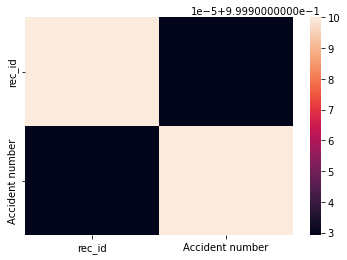

In [34]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Accident size', ylabel='count'>

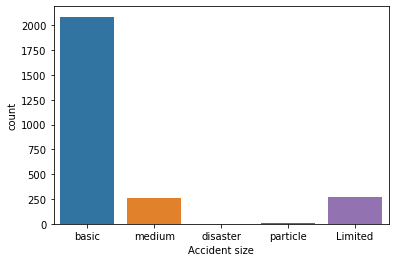

In [10]:
# Displays the count of accident size based on the types of accident size
sns.countplot(x='Accident size',data=df)

<AxesSubplot:xlabel='Road condition', ylabel='count'>

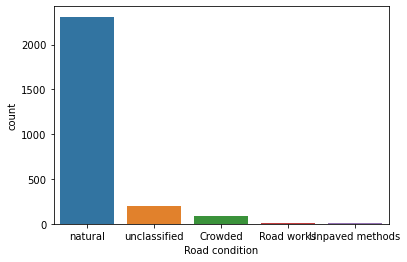

In [11]:
# Displays the count of road condition based on the types of road condition
sns.countplot(x='Road condition',data=df)

<AxesSubplot:xlabel='Weather condition', ylabel='count'>

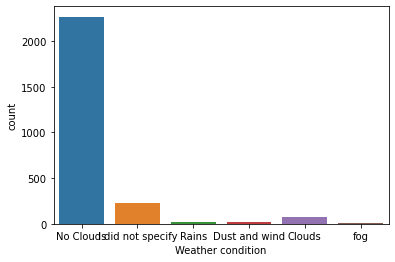

In [12]:
# Displays the count of weather condition based on the types of weather condition
sns.countplot(x='Weather condition',data=df)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# the below columns are dropped for the X variable since they do not relate to the target variable accident size 
X=df.drop(['Accident size','rec_id','Accident number','Competent Department','Competent Center',
           'Amount rating','Date of the accident','The date and time of the notification',
           'Date and time of first arrival','Date and time of completion of control',
            'End date and time of the operation','Departure date and time','Date and time of return to the center',
          'Accident Group','Type of accident','Direct damage','Acccident scene category','Accident scene',
          'Accident title','Activity','The cause of the accident'],axis=1)
y=df['Accident size']

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Which columns to make into numbers
categorical_features = ["from sklearn.preprocessing import OneHotEncoder"]
from sklearn.compose import ColumnTransformer

# Which columns to make into numbers
categorical_features = ["The band's work summary","Weather condition","Road condition","Priority level"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                 categorical_features)],
                               remainder = "passthrough")

# Transformed x variables which are now numbers are trained for decision tree model
transformed_X = transformer.fit_transform(X)

In [27]:
# Displays details about the transformed X variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   The band's work summary  2618 non-null   object
 1   Weather condition        2618 non-null   object
 2   Road condition           2618 non-null   object
 3   Priority level           2618 non-null   object
dtypes: object(4)
memory usage: 81.9+ KB


In [17]:
X_train, X_test, y_train, y_test=train_test_split(transformed_X,y,test_size=0.30,random_state = 101)

In [18]:
# Imports the decision tree classifier library to build a decision tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree= DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
predictions = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
# An accuracy of 84% shows that the decision tree model is accurate for the accident dataset 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Limited       0.65      0.53      0.58        79
       basic       0.88      0.95      0.91       633
    disaster       0.00      0.00      0.00         1
      medium       0.58      0.25      0.35        72
    particle       0.00      0.00      0.00         1

    accuracy                           0.84       786
   macro avg       0.42      0.35      0.37       786
weighted avg       0.82      0.84      0.83       786



/Users/Maarij/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maarij/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maarij/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(confusion_matrix(y_test,predictions))

[[ 42  36   0   1   0]
 [ 18 604   0  11   0]
 [  0   1   0   0   0]
 [  5  48   0  18   1]
 [  0   0   0   1   0]]


In [25]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus 
import graphviz

# displays the variables stored 
features = X
features

The band's work summary Weather condition Road condition  \
0                               Transfer         No Clouds        natural   
1                               Transfer         No Clouds        natural   
2     Ambulance and transfer of a person         No Clouds        natural   
3                           take actions         No Clouds        natural   
4                           take actions         No Clouds        natural   
...                                  ...               ...            ...   
2613                 Being and preparing         No Clouds        natural   
2614                       Fire fighting         No Clouds        natural   
2615                  Control and rescue         No Clouds        natural   
2616                     Fire inspection         No Clouds        natural   
2617                              rescue         No Clouds        natural   

      Priority level  
0          Important  
1     very important  
2             Normal  
3          Important  
4     very important  
...              ...  
2613          Normal  
2614          Normal  
2615       Important  
2616          Normal  
2617          Normal  

[2618 rows x 4 columns]

In [26]:
# Displays the decision tree model based on the attributes stored in X variable
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=None,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("tree.png")
Image(graph.create_png())  